In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from bs4 import BeautifulSoup # Used for separating text and code
from nltk.stem import SnowballStemmer

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_da

In [2]:
df = pd.read_csv("FINAL.csv") #encoding='ISO-8859-1'

In [3]:
df

,Id,CreationDate,Score,Title,Body,Tag,code_snippets,body_words,body_words_preprocessed_task1,title_preprocessed_task1,body_words_preprocessed_task2,title_preprocessed_task2,weight_title_body_preprocessed_task2,weight_title_body_preprocessed_task1
0,19280,2008-08-21T03:20:05Z,16,Code to ask yes/no question in javascript,<p>I could only find the function <code>confir...,['javascript'],[],I could only find the function confirm() that ...,could function confirm ( ) ok/cancel button . ...,code yes/no question javascript,i could onli find the function confirm ( ) tha...,code to ask yes/no question in javascript,code to ask yes/no question in javascript code...,code yes/no question javascript code yes/no qu...
1,19970,2008-08-21T13:58:25Z,2,Best way to keep an ordered list of windows (f...,<p>What is the best way to manage a list of wi...,['javascript'],[],What is the best way to manage a list of windo...,best way list window ( order ) abl next window...,best way order list window ( most-rec ) ?,what is the best way to manag a list of window...,best way to keep an order list of window ( fro...,best way to keep an order list of window ( fro...,best way order list window ( most-rec ) ? best...
2,22720,2008-08-22T15:58:13Z,3,Configure a Java Socket to fail-fast on discon...,<p>I have a listening port on my server that I...,"['java', 'exception', 'sockets', 'networking']","['Socket mySocket = new Socket(host,port);', '...",I have a listening port on my server that I'm ...,"port server java class socket interfac , i.e.i...",configur java socket fail-fast disconnect ?,i have a listen port on my server that i 'm co...,configur a java socket to fail-fast on disconn...,configur a java socket to fail-fast on disconn...,configur java socket fail-fast disconnect ? co...
3,29680,2008-08-27T07:40:01Z,5,Suppress NTLM dialog box after unauthorized re...,"<p>In a recent sharepoint project, I implement...","['asp.net', 'javascript', 'sharepoint']",['function Login() { var request = GetReques...,"In a recent sharepoint project, I implemented ...","recent sharepoint project , authent webpart nt...",suppress dialog box unauthor request,"in a recent sharepoint project , i implement a...",suppress ntlm dialog box after unauthor request,suppress ntlm dialog box after unauthor reques...,suppress dialog box unauthor request suppress ...
4,30540,2008-08-27T16:02:00Z,6,What does this javascript error mean? Permissi...,<p>This error just started popping up all over...,"['javascript', 'flash']",[],This error just started popping up all over ou...,error site.permiss method googl post crossdoma...,javascript error mean ? permiss method,this error just start pop up all over our site...,what doe this javascript error mean ? permiss ...,what doe this javascript error mean ? permiss ...,javascript error mean ? permiss method javascr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62006,40139580,2016-10-19T19:05:18Z,0,Wordpress Plugin error. Backup Buddy,<p>I am having a error when using <code>Backup...,"['javascript', 'wordpress']",[],I am having a error when using BackupBuddy plu...,error backupbuddi plugin wordpress . error any...,wordpress plugin error . backup buddi,i am have a error when use backupbuddi plugin ...,wordpress plugin error . backup buddi,wordpress plugin error . backup buddi wordpres...,wordpress plugin error . backup buddi wordpres...
62007,40139900,2016-10-19T19:23:29Z,-1,"Shopify not loading JS script, although loadin...",<p>So I'm trying to figure out what I thought ...,"['javascript', 'jquery']",[],So I'm trying to figure out what I thought was...,thought relat simpl issu . follow : jqueri ( l...,"shopifi js script , load consol work",so i 'm tri to figur out what i thought was a ...,"shopifi not load js script , although load in ...","shopifi not load js script , although load in ...","shopifi js script , load consol work shopifi j..."
62008,40140970,2016-10-19T20:29:16Z,-1,autoplay the contents within a div with jquery,<p>I have

### Splitting the body into codes and words

In [4]:
# Step 1: Do both on the merge_df and the answer_df
# Step 2: Separating my code and words into another column
# Step 3: Cleaning up the <tags> of the words and code column
# merged_df
# answers_df
# questions_df

import re
from bs4 import BeautifulSoup

df['code_snippets'] = ''
df['body_words'] = ''

# Combine text of "Title" and "Body" and name it as "Text", and give Title 3 times more importance
df["Text"] = df["Title"] * 3 + " " + df["Body"]
df.head()

for index, row in df.iterrows():

    # Removing all the escape sequences
    row["Body"] = re.sub(r'[\n\t\r\f]', '', row["Body"]) # Not sure if you want us to remove it

    # Split the body into code_snippets and body_words
    soup = BeautifulSoup(row['Body'], 'html.parser')
    
    code_snippets = []
    text_without_code = ''

    # Extract code snippets from <pre><code></pre></code> tags
    for pre in soup.find_all('pre'):
        code_snippets.extend(code.get_text() for code in pre.find_all('code'))
        pre.decompose()  # Remove <pre> tags and their contents
    
    # Extract text content without code snippets
    text_without_code = soup.get_text()

    df.at[index, 'code_snippets'] = code_snippets
    df.at[index, 'body_words'] = text_without_code


In [5]:
df

,Id,CreationDate,Score,Title,Body,Tag,code_snippets,body_words,body_words_preprocessed_task1,title_preprocessed_task1,body_words_preprocessed_task2,title_preprocessed_task2,weight_title_body_preprocessed_task2,weight_title_body_preprocessed_task1,Text
0,19280,2008-08-21T03:20:05Z,16,Code to ask yes/no question in javascript,<p>I could only find the function <code>confir...,['javascript'],[],I could only find the function confirm() that ...,could function confirm ( ) ok/cancel button . ...,code yes/no question javascript,i could onli find the function confirm ( ) tha...,code to ask yes/no question in javascript,code to ask yes/no question in javascript code...,code yes/no question javascript code yes/no qu...,Code to ask yes/no question in javascriptCode ...
1,19970,2008-08-21T13:58:25Z,2,Best way to keep an ordered list of windows (f...,<p>What is the best way to manage a list of wi...,['javascript'],[],What is the best way to manage a list of windo...,best way list window ( order ) abl next window...,best way order list window ( most-rec ) ?,what is the best way to manag a list of window...,best way to keep an order list of window ( fro...,best way to keep an order list of window ( fro...,best way order list window ( most-rec ) ? best...,Best way to keep an ordered list of windows (f...
2,22720,2008-08-22T15:58:13Z,3,Configure a Java Socket to fail-fast on discon...,<p>I have a listening port on my server that I...,"['java', 'exception', 'sockets', 'networking']","[Socket mySocket = new Socket(host,port);, tcp...",I have a listening port on my server that I'm ...,"port server java class socket interfac , i.e.i...",configur java socket fail-fast disconnect ?,i have a listen port on my server that i 'm co...,configur a java socket to fail-fast on disconn...,configur a java socket to fail-fast on disconn...,configur java socket fail-fast disconnect ? co...,Configure a Java Socket to fail-fast on discon...
3,29680,2008-08-27T07:40:01Z,5,Suppress NTLM dialog box after unauthorized re...,"<p>In a recent sharepoint project, I implement...","['asp.net', 'javascript', 'sharepoint']",[function Login() { var request = GetRequest...,"In a recent sharepoint project, I implemented ...","recent sharepoint project , authent webpart nt...",suppress dialog box unauthor request,"in a recent sharepoint project , i implement a...",suppress ntlm dialog box after unauthor request,suppress ntlm dialog box after unauthor reques...,suppress dialog box unauthor request suppress ...,Suppress NTLM dialog box after unauthorized re...
4,30540,2008-08-27T16:02:00Z,6,What does this javascript error mean? Permissi...,<p>This error just started popping up all over...,"['javascript', 'flash']",[],This error just started popping up all over ou...,error site.permiss method googl post crossdoma...,javascript error mean ? permiss method,this error just start pop up all over our site...,what doe this javascript error mean ? permiss ...,what doe this javascript error mean ? permiss ...,javascript error mean ? permiss method javascr...,What does this javascript error mean? Permissi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62006,40139580,2016-10-19T19:05:18Z,0,Wordpress Plugin error. Backup Buddy,<p>I am having a error when using <code>Backup...,"['javascript', 'wordpress']",[],I am having a error when using BackupBuddy plu...,error backupbuddi plugin wordpress . error any...,wordpress plugin error . backup buddi,i am have a error when use backupbuddi plugin ...,wordpress plugin error . backup buddi,wordpress plugin error . backup buddi wordpres...,wordpress plugin error . backup buddi wordpres...,Wordpress Plugin error. Backup BuddyWordpress ...
62007,40139900,2016-10-19T19:23:29Z,-1,"Shopify not loading JS script, although loadin...",<p>So I'm trying to figure out what I thought ...,"['javascript', 'jquery']",[],So I'm trying to figure out what I thought was...,thought relat simpl issu . follow : jqueri ( l...,"shopifi js script , load conso

### Finding out the top 20 frequent words that occurred in text column

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Concatenate 'Text' and 'body_words_preprocessed' columns
# documents = questions_df['Text'] + ' ' + questions_df['body_words']
documents = df['Text'] 

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(documents)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Sum the occurrences of each word
word_counts = X.sum(axis=0)

# Get the indices of the 20 most frequent words
top_word_indices = word_counts.argsort()[0, -20:][::-1]

# Get the actual words
top_words = [feature_names[idx] for idx in top_word_indices]

# Print the 20 most frequent words
print("20 Most Frequent Words:")
print(top_words)

20 Most Frequent Words:
[array([['html', 'li', 'type', 'public', 'text', 'data', 'javascript',
        'value', 'string', 'var', 'new', 'id', 'java', 'function', 'div',
        'class', 'pre', 'code', 'lt', 'gt']], dtype=object)]


### LDA

In [8]:
pip install --upgrade numpy

In [5]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import pandas as pd

# Get the top words
top_words = ['html', 'li', 'type', 'public', 'text', 'data', 'javascript',
        'value', 'string', 'var', 'new', 'id', 'java', 'function', 'div',
        'class', 'pre', 'code', 'lt', 'gt', 'using', 'strong', 'cars', 'want', 'would', 'use', 'one', 'like']

# Add the top words to the list of stop words
stop_list = stopwords.words('english')
stop_list += top_words

# Apply preprocessing to 'Text' column to remove top words
def remove_top_words(text):
    words = simple_preprocess(text)
    words = [word for word in words if word not in stop_list and len(word) > 1]  # Exclude single characters
    return ' '.join(words)

df['preprocessed_text'] = df['Text'].apply(remove_top_words)

dictionary = Dictionary(df['preprocessed_text'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(text.split()) for text in df['preprocessed_text']]


num_topics = 12 
random_state = 42 
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=8, random_state=random_state)


# Discover words in each topic for each document with values >= 0.2
topic_words_list = []

for i, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)
    doc_topic_words = []
    for topic_num, prob in doc_topics:
        if prob >= 0.2:
            topic_terms = lda_model.get_topic_terms(topic_num, topn=8)  # Get top 8 terms for each topic
            topic_words = [dictionary.id2token[term[0]] for term in topic_terms]  # Convert term IDs to words
            doc_topic_words.append(topic_words)
    topic_words_list.append(doc_topic_words)
    

df['topic_words'] = topic_words_list

In [10]:
df

,Id,CreationDate,Score,Title,Body,Tag,code_snippets,body_words,body_words_preprocessed_task1,title_preprocessed_task1,body_words_preprocessed_task2,title_preprocessed_task2,weight_title_body_preprocessed_task2,weight_title_body_preprocessed_task1,Text,preprocessed_text,topic_words
0,19280,2008-08-21T03:20:05Z,16,Code to ask yes/no question in javascript,<p>I could only find the function <code>confir...,['javascript'],[],I could only find the function confirm() that ...,could function confirm ( ) ok/cancel button . ...,code yes/no question javascript,i could onli find the function confirm ( ) tha...,code to ask yes/no question in javascript,code to ask yes/no question in javascript code...,code yes/no question javascript code yes/no qu...,Code to ask yes/no question in javascriptCode ...,ask yes question javascriptcode ask yes questi...,"[[object, writeobject, em, save, way, console,..."
1,19970,2008-08-21T13:58:25Z,2,Best way to keep an ordered list of windows (f...,<p>What is the best way to manage a list of wi...,['javascript'],[],What is the best way to manage a list of windo...,best way list window ( order ) abl next window...,best way order list window ( most-rec ) ?,what is the best way to manag a list of window...,best way to keep an order list of window ( fro...,best way to keep an order list of window ( fro...,best way order list window ( most-rec ) ? best...,Best way to keep an ordered list of windows (f...,best way keep ordered list windows recently cr...,"[[object, writeobject, em, save, way, console,..."
2,22720,2008-08-22T15:58:13Z,3,Configure a Java Socket to fail-fast on discon...,<p>I have a listening port on my server that I...,"['java', 'exception', 'sockets', 'networking']","[Socket mySocket = new Socket(host,port);, tcp...",I have a listening port on my server that I'm ...,"port server java class socket interfac , i.e.i...",configur java socket fail-fast disconnect ?,i have a listen port on my server that i 'm co...,configur a java socket to fail-fast on disconn...,configur a java socket to fail-fast on disconn...,configur java socket fail-fast disconnect ? co...,Configure a Java Socket to fail-fast on discon...,configure socket fail fast disconnect configur...,"[[object, writeobject, em, save, way, console,..."
3,29680,2008-08-27T07:40:01Z,5,Suppress NTLM dialog box after unauthorized re...,"<p>In a recent sharepoint project, I implement...","['asp.net', 'javascript', 'sharepoint']",[function Login() { var request = GetRequest...,"In a recent sharepoint project, I implemented ...","recent sharepoint project , authent webpart nt...",suppress dialog box unauthor request,"in a recent sharepoint project , i implement a...",suppress ntlm dialog box after unauthor request,suppress ntlm dialog box after unauthor reques...,suppress dialog box unauthor request suppress ...,Suppress NTLM dialog box after unauthorized re...,suppress ntlm dialog box unauthorized requests...,"[[php, ajax, json, url, error, echo, get, amp]..."
4,30540,2008-08-27T16:02:00Z,6,What does this javascript error mean? Permissi...,<p>This error just started popping up all over...,"['javascript', 'flash']",[],This error just started popping up all over ou...,error site.permiss method googl post crossdoma...,javascript error mean ? permiss method,this error just start pop up all over our site...,what doe this javascript error mean ? permiss ...,what doe this javascript error mean ? permiss ...,javascript error mean ? permiss method javascr...,What does this javascript error mean? Permissi...,error mean permission denied call method locat...,"[[object, writeobject, em, save, way, console,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62006,40139580,2016-10-19T19:05:18Z,0,Wordpress Plugin error. Backup Buddy,<p>I am having a error when using <code>Backup...,"['javascript', 'wordpress']",[],I am having a error when using BackupBuddy plu...,error backupbuddi plugin wordpress . error any...,wordpress plugin error . backu

In [24]:
#Exploring the topics

df['topic_words'][99]

[['array', 'list', 'item', 'element', 'name', 'add', 'get', 'key'],
 ['td', 'col', 'table', 'tr', 'row', 'th', 'sm', 'hidden']]

In [20]:
#Exploring the topics

df['topic_words'][1202]

[['input', 'name', 'form', 'amp', 'document', 'email', 'label', 'br']]

In [22]:
#Exploring the topics

df['topic_words'][2722]

[['object', 'writeobject', 'em', 'save', 'way', 'console', 'method', 'get'],
 ['google', 'map', 'intent', 'maps', 'asp', 'product', 'location', 'api']]

In [23]:
#Exploring the topics

df['topic_words'][1999]

[['object', 'writeobject', 'em', 'save', 'way', 'console', 'method', 'get'],
 ['array', 'list', 'item', 'element', 'name', 'add', 'get', 'key'],
 ['int', 'system', 'println', 'return', 'number', 'integer', 'static', 'void']]

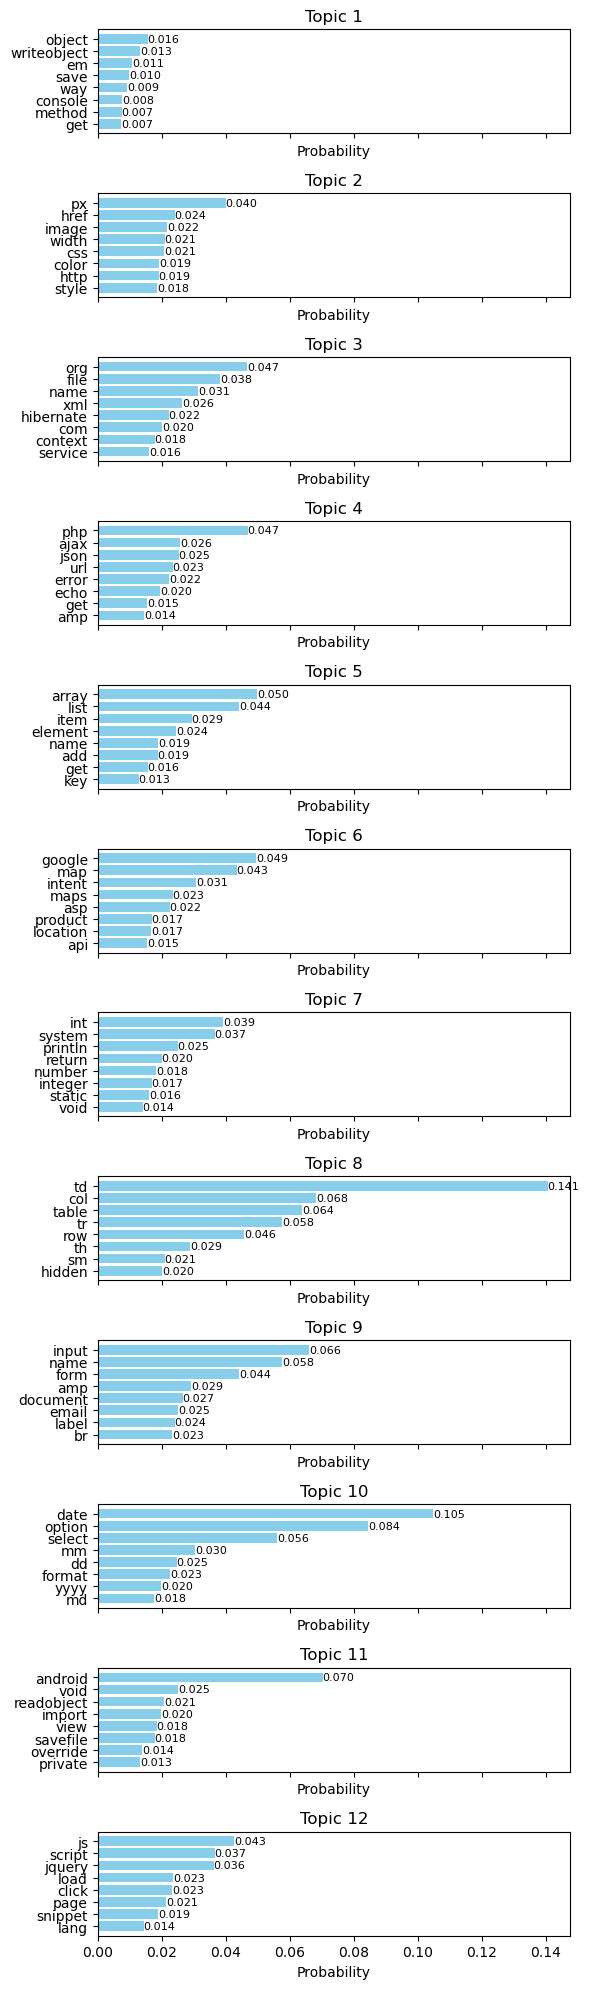

In [6]:
import matplotlib.pyplot as plt

def plot_top_words(lda_model, num_topics, num_words=8): 
    # Get the top words for each topic
    top_words_per_topic = []
    top_probabilities_per_topic = []
    for topic_id in range(num_topics):
        top_words, top_probs = zip(*lda_model.show_topic(topic_id, topn=num_words))  # Limit to top num_words words
        top_words_per_topic.append(top_words)
        top_probabilities_per_topic.append(top_probs)

    # Plotting
    fig, axes = plt.subplots(nrows=num_topics, ncols=1, figsize=(6, 20), sharex=True)
    for i, ax in enumerate(axes.flatten()):
        bars = ax.barh(top_words_per_topic[i], top_probabilities_per_topic[i], color='skyblue')
        ax.set_title(f'Topic {i+1}')
        ax.set_xlabel('Probability')
        ax.invert_yaxis()
        ax.tick_params(axis='y', which='major', labelsize=10)
        for bar, prob in zip(bars, top_probabilities_per_topic[i]):
            ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{prob:.3f}', 
                    va='center', ha='left', fontsize=8, color='black')  
    plt.tight_layout()
    plt.show()

plot_top_words(lda_model, num_topics)

### Topic Viz

In [12]:
!pip3 install pyldavis

  Using cached numpy-1.24.4-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.24.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.
bokeh 2.4.3 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.


In [13]:
!python -m pip install -U pyLDAvis

In [14]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [15]:
# Generate LDA visualization
visual = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(visual, "topic_viz.html")

### Coherence Model

In [16]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=df['preprocessed_text'].apply(lambda x: x.split()), dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model.get_coherence()

print(f'Coherence Score: {coherence_lda}')

Coherence Score: 0.5736514145233342


In [17]:
import datetime
from gensim.models import CoherenceModel

print(datetime.datetime.now())

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 21):
    sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    coherencemodel = CoherenceModel(model=sg_lda_x, texts=df['preprocessed_text'].apply(lambda x: x.split()), dictionary=dictionary, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(sg_lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    print(f"Number of Topics: {num_topics} | Coherence Score: {coherencemodel.get_coherence()}")

print(datetime.datetime.now())

2024-04-06 22:16:46.374317
Number of Topics: 2 | Coherence Score: 0.5356544554737386
Number of Topics: 3 | Coherence Score: 0.5449537844805861
Number of Topics: 4 | Coherence Score: 0.5815426705411715
Number of Topics: 5 | Coherence Score: 0.5914987236640854
Number of Topics: 6 | Coherence Score: 0.525522930065924
Number of Topics: 7 | Coherence Score: 0.5562339344367427
Number of Topics: 8 | Coherence Score: 0.509928012460862
Number of Topics: 9 | Coherence Score: 0.5624402695763719
Number of Topics: 10 | Coherence Score: 0.6106890952406376
Number of Topics: 11 | Coherence Score: 0.5508227897682487
Number of Topics: 12 | Coherence Score: 0.5721440468545849
Number of Topics: 13 | Coherence Score: 0.5829783064591054
Number of Topics: 14 | Coherence Score: 0.5981255083710025
Number of Topics: 15 | Coherence Score: 0.5369270228370326
Number of Topics: 16 | Coherence Score: 0.5651203595979313
Number of Topics: 17 | Coherence Score: 0.5432799308818788
Number of Topics: 18 | Coherence Score:

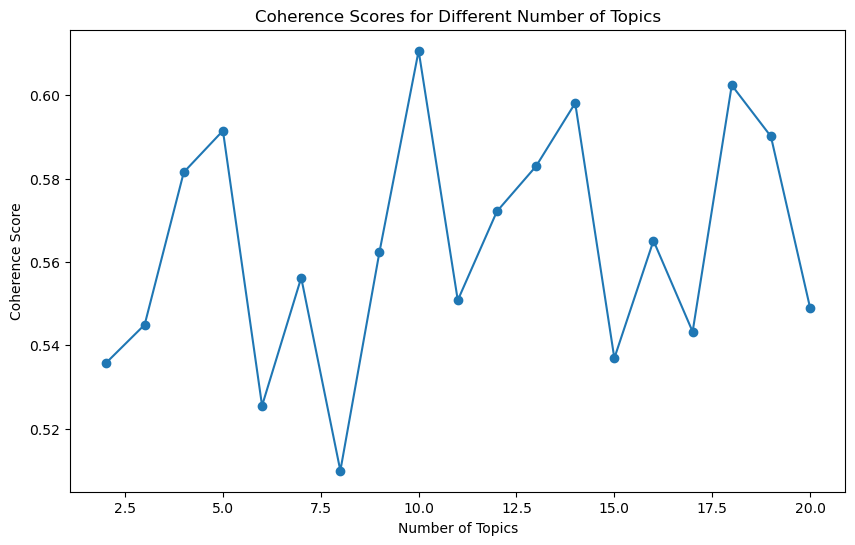

2024-04-06 23:08:01.215924


In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(model_topics, coherence_values, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores for Different Number of Topics')
plt.show()

print(datetime.datetime.now())